In [57]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [58]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [59]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [60]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [61]:
# reflect an existing database into a new model
Base = automap_base()  
# reflect the tables
 
Base.prepare(engine, reflect=True) 

/var/folders/g8/1c3rwbsj7dsgsh5sg7m2yp0w0000gn/T/ipykernel_35109/2374042676.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [62]:
# View all of the classes that automap found
table_names = list(Base.classes.keys())
print(table_names)

['station', 'measurement']


In [63]:
# Save references to each table
tables = {table_name: Base.classes.get(table_name) for table_name in table_names}

In [64]:
# Save references to each table
Station = Base.classes.get('station')  
Measurement = Base.classes.get('measurement') 

In [65]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [66]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

Text(0, 0.5, 'Inches')

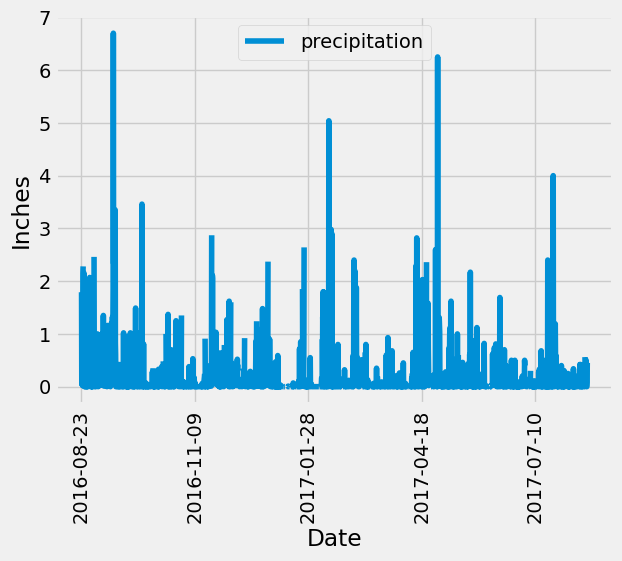

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


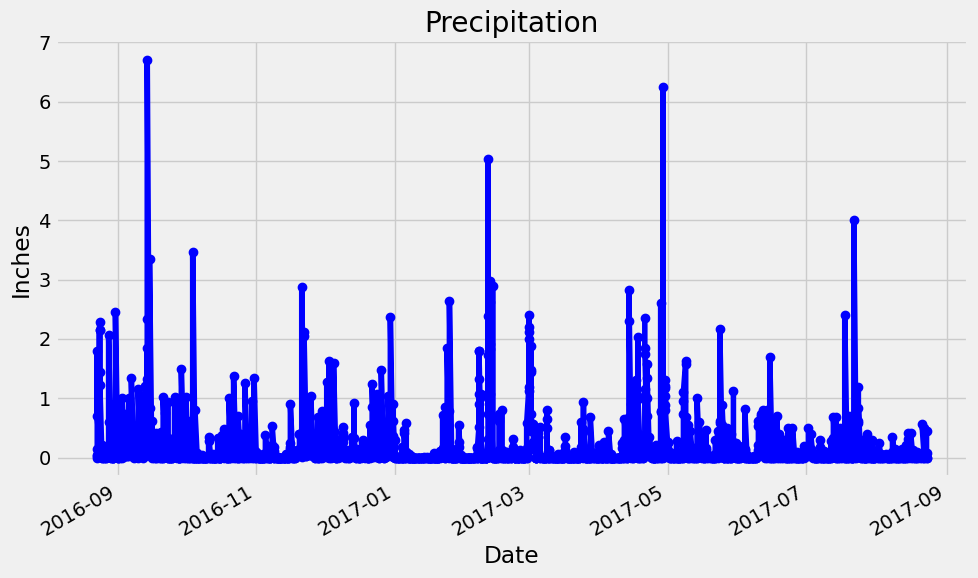

In [67]:
from datetime import datetime, timedelta  

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

end_date = datetime.strptime(most_recent_date, '%Y-%m-%d')
start_date = end_date - timedelta(days=365)  # Approximate 12 months as 365 days


# Perform a query to retrieve the data and precipitation scores
query_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date.strftime('%Y-%m-%d')).\
    filter(Measurement.date <= end_date.strftime('%Y-%m-%d')).\
    order_by(Measurement.date).all()

# Check if data was retrieved
if not query_results:
    print("No precipitation data found for the specified date range.")
    session.close()
    exit()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(query_results, columns=['Date', 'Precipitation'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Sort the dataframe by date
df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
df['Precipitation'].plot(marker='o', linestyle='-', color='b')
plt.title('Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.grid(True)
plt.tight_layout()
plt.show()


In [68]:
summary_stats = df['Precipitation'].describe()
print("Precipitation:")
summary_stats

Precipitation:


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [69]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(func.count(Station.station)).all()
total_stations 


[(9,)]

In [71]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(
    Measurement.station,
    func.count(Measurement.station).label('count')
).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = active_stations[0][0] 

In [75]:
temperature_stats = session.query(
    func.min(Measurement.tobs).label('min_temp'),
    func.max(Measurement.tobs).label('max_temp'),
    func.avg(Measurement.tobs).label('avg_temp')
).filter(Measurement.station == most_active_station_id).all()

In [76]:
temperature_stats

[(54.0, 85.0, 71.66378066378067)]

In [79]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


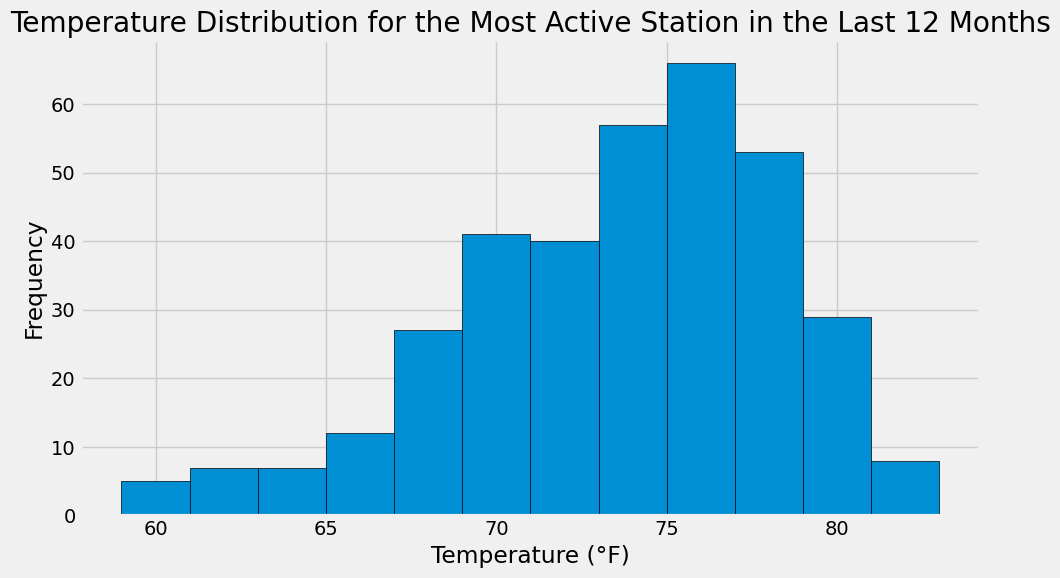

In [77]:
# Calculate the date one year from the most recent date
most_recent_date = session.query(func.max(Measurement.date)).scalar()
end_date = datetime.strptime(most_recent_date, '%Y-%m-%d')
start_date = end_date - timedelta(days=365)  # Approximate 12 months as 365 days

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= start_date.strftime('%Y-%m-%d')).\
    filter(Measurement.date <= end_date.strftime('%Y-%m-%d')).\
    all()

# Close the session 
session.close()

# Convert query results to a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Temperature'])

# Plot the histogram of temperature data
plt.figure(figsize=(10, 6))
plt.hist(temperature_df['Temperature'], bins=12, edgecolor='black')
plt.title('Temperature Distribution for the Most Active Station in the Last 12 Months')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Close Session

In [78]:
# Close Session
session.close()